In [63]:
from sympy import *
I, I0, sI, sI0 = symbols('I I_0 s_I s_{I_0}')
T = I/I0
sT = (diff(T,I)*sI)**2
sT += (diff(T,I0)*sI0)**2
sT = sqrt(sT)
display(sT)

sqrt(I**2*s_{I_0}**2/I_0**4 + s_I**2/I_0**2)

In [64]:
#print(latex(T))
#print(latex(sT))

In [65]:
I, I0, sI, sI0 = symbols('I I0 sI sI0')
T = I/I0
sT = (diff(T,I)*sI)**2
sT += (diff(T,I0)*sI0)**2
sT = sqrt(sT)
print(sT)

sqrt(I**2*sI0**2/I0**4 + sI**2/I0**2)


In [66]:
import pandas as pd
from numpy import *

I0 = 8060
sI0 = 100

data = pd.read_csv('data1.csv')

I = data['I']
sI = data['s_I']

data['T'] = (I/I0).round(2)
data['sT'] = sqrt(I**2*sI0**2/I0**4 + sI**2/I0**2).round(2)

display(data)

,I,s_I,T,sT
0,4180,50,0.52,0.01
1,4170,50,0.52,0.01
2,4200,50,0.52,0.01
3,4130,50,0.51,0.01
4,4130,50,0.51,0.01
5,4200,50,0.52,0.01
6,4000,50,0.50,0.01
7,4200,50,0.52,0.01
8,4080,50,0.51,0.01
9,3990,50,0.50,0.01


In [67]:
#print(data.to_latex())

In [68]:
z = (0.52 - 0.50)/sqrt(2*0.01**2) #Estadistico de prueba Z
print(z) #Las muestras son todas iguales

1.4142135623730963


,n,I,s_I
0,0,8060,60
1,1,4180,50
2,2,2160,40
3,3,1150,20
4,4,600,20
5,5,307,10
6,6,160,10
7,7,77,10


results:  [5.20780186e-01 8.05191352e+03]
standar deviations:  [2.02709896e-03 5.38364989e+01]
standar error:  [2.71411797e-02 7.20826225e+02]


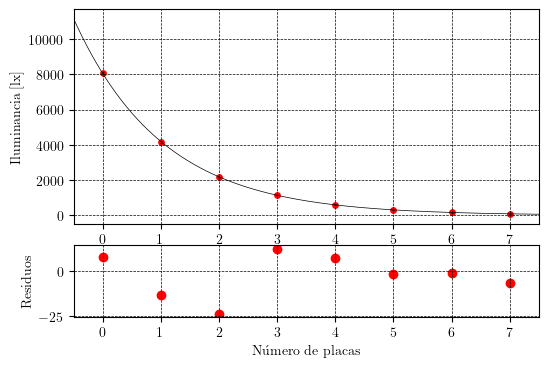

In [76]:
###Defying the model

data = pd.read_csv('data2.csv')
x_data = data['n']
y_data = data['I']
y_error = data['s_I']
N = len(data)
display(data)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
from scipy.optimize import curve_fit

def I_model(n,T,I0):
    return T**n*I0

###Model fitting
T, I0 = .5 , 8000.
init_values = [T,I0]

fit, covariance = curve_fit(I_model,x_data,y_data,
                            p0 = init_values,
                            absolute_sigma = True,
                            sigma = y_error)
nu = N - 2 #### degrees of freedom = number of data points - number of parameters fitted
std_dev = sqrt(diag(covariance))
residuals = y_data - I_model(x_data,fit[0],fit[1])
std_error = sqrt(diag(covariance)*sum(residuals**2)/nu)


print('results: ', fit)
print('standar deviations: ', std_dev)
print('standar error: ', std_error)


#Plotting
xmin = x_data[0] - .5
xmax = x_data[N-1] + .5
xfit = linspace(xmin,xmax,1000)
yfit = I_model(xfit,fit[0],fit[1])
fig = plt.figure(1, figsize = (6,4))
gs = gridspec.GridSpec(2, 1, height_ratios = [6,2],
                       hspace= 0.15)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
def plotStyle():
    plt.grid(b = True, ls = '--',
            lw = 0.5, c = 'k')
    plt.xlim(xmin,xmax)
 
#Subplot: fitted function
ax1 = fig.add_subplot(gs[0])
ax1.set_ylabel('Iluminancia  [lx]')
ax1.scatter(x_data,y_data,c = 'r',s = 15)
ax1.errorbar(x_data,y_data, ls = 'none',
             c = 'k',
             yerr = y_error,
             elinewidth= 0.5,
             capsize = 1,
             capthick = 0.5)
ax1.plot(xfit,yfit,lw = 0.5,
             c = 'k')
#ax1.set_xticklabels([])
plotStyle()

#Subplot: Residuals
ax2 = fig.add_subplot(gs[1])
ax2.scatter(x_data,residuals,c = 'r')
ax2.set_xlabel('Número de placas')
ax2.set_ylabel('Residuos')
plotStyle()
plt.savefig('plot1.eps')
plt.show()


#resultados T, I0

In [70]:
#print(data.to_latex())

,n,I,s_I
0,0,165.0,10.0
1,1,84.0,5.0
2,2,43.0,5.0
3,3,21.5,1.0
4,4,12.5,0.5
5,5,5.5,0.5
6,6,3.3,0.1
7,7,1.4,0.1


results:  [  0.51754428 163.90659227]
standar deviations:  [4.34485092e-03 6.36553262e+00]
standar error:  [4.02818082e-03 5.90158716e+00]


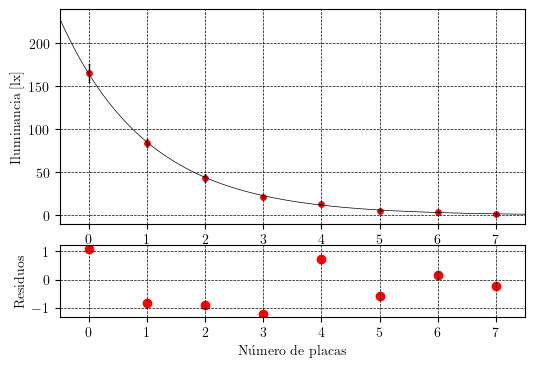

In [75]:
###Defying the model

data = pd.read_csv('data3.csv')

x_data = data['n']
y_data = data['I']
y_error = data['s_I']
N = len(data)
display(data)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
from scipy.optimize import curve_fit

def I_model(n,T,I0):
    return T**n*I0

###Model fitting
T, I0 = .5 , 8000.
init_values = [T,I0]

fit, covariance = curve_fit(I_model,x_data,y_data,
                            p0 = init_values,
                            absolute_sigma = True,
                            sigma = y_error)
nu = N - 2 #### degrees of freedom = number of data points - number of parameters fitted
std_dev = sqrt(diag(covariance))
residuals = y_data - I_model(x_data,fit[0],fit[1])
std_error = sqrt(diag(covariance)*sum(residuals**2)/nu)


print('results: ', fit)
print('standar deviations: ', std_dev)
print('standar error: ', std_error)


#Plotting
xmin = x_data[0] - .5
xmax = x_data[N-1] + .5
xfit = linspace(xmin,xmax,1000)
yfit = I_model(xfit,fit[0],fit[1])
fig = plt.figure(1, figsize = (6,4))
gs = gridspec.GridSpec(2, 1, height_ratios = [6,2],
                       hspace= 0.15)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
def plotStyle():
    plt.grid(b = True, ls = '--',
            lw = 0.5, c = 'k')
    plt.xlim(xmin,xmax)
 
#Subplot: fitted function
ax1 = fig.add_subplot(gs[0])
ax1.set_ylabel('Iluminancia  [lx]')
ax1.scatter(x_data,y_data,c = 'r',s = 15)
ax1.errorbar(x_data,y_data, ls = 'none',
             c = 'k',
             yerr = y_error,
             elinewidth= 1,
             capsize = 1,
             capthick = 0.5)
ax1.plot(xfit,yfit,lw = 0.5,
             c = 'k')
#ax1.set_xticklabels([])
plotStyle()

#Subplot: Residuals
ax2 = fig.add_subplot(gs[1])
ax2.scatter(x_data,residuals,c = 'r')
ax2.set_xlabel('Número de placas')
ax2.set_ylabel('Residuos')
plotStyle()
plt.savefig('plot2.eps')
plt.show()

#resultados T, I0

In [72]:
#print(data.to_latex())